# 株価予測に使える10の指標データと相関関係のPython分析: 
# マクロ経済を見ていこう
# Python で米国株をデータ分析

github:
https://gist.github.com/beavis28/87fe7ff0b148571826c7632e99015f10#file-important-economy-indicators-ipynb



In [1]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 4.7 MB/s 
     |████████████████████████████████| 83 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 52.0 MB/s 
     |████████████████████████████████| 111 kB 59.6 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=b92129170924058b78970758bf440244a9030a571d6a3788cef1e3be913ec178
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=025550890c6cbb430b4eacbe567af99605604b4100c4740ea0a3558616aa711b
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=6b074014c20211accbee17f77b5645641b827dc5263eb0da29eccc00101e3652
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

## S&P500 の基準データを作る

Tickerコードは ^GSPC

In [18]:
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [24, 8]
data_days = 360

In [19]:
def getData(ticker, days=360):
    data = si.get_data(ticker)
    data = data.tail(days)
    data = data.drop(columns=['open', 'high', 'low', 'adjclose', 'volume'])
    return data

In [20]:
base_hist_data = getData('^GSPC')
base_hist_data

close ticker
2020-09-30  3363.000000  ^GSPC
2020-10-01  3380.800049  ^GSPC
2020-10-02  3348.419922  ^GSPC
2020-10-05  3408.600098  ^GSPC
2020-10-06  3360.969971  ^GSPC
...                 ...    ...
2022-02-28  4373.939941  ^GSPC
2022-03-01  4306.259766  ^GSPC
2022-03-02  4386.540039  ^GSPC
2022-03-03  4363.490234  ^GSPC
2022-03-04  4328.870117  ^GSPC

[360 rows x 2 columns]

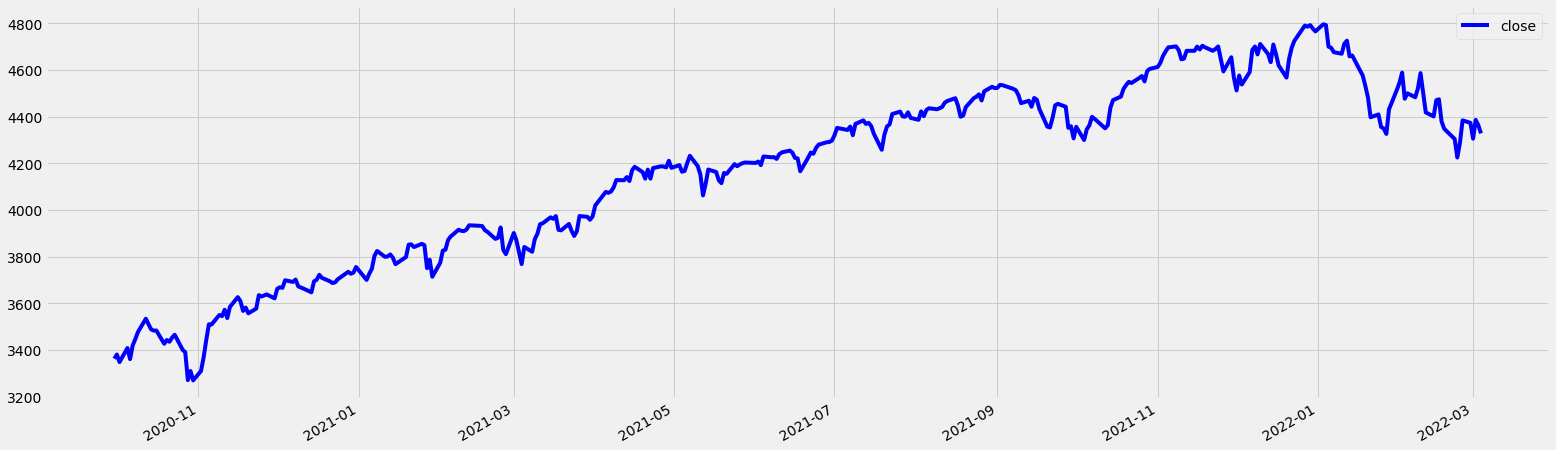

In [21]:
base_hist_data.plot(kind='line', y='close', color='blue')

## 2つのチャートを同時に表示する

横軸は、共有している、日付とする。
縦軸は、右にS&P500 (赤), 左側をQQQ (青)を表示する。

データをマージすると自動的にカラム名が変わるので注意すること。
最初のデータのカラムには '_x'が、2番目のデータのカラムには '_y' がつく。
(例) <i>Column</i>_x, <i>Column</i>_y

In [23]:
# QQQ のデータを取得
hist_data = getData("QQQ")
hist_data

close ticker
2020-09-30  277.839996    QQQ
2020-10-01  282.250000    QQQ
2020-10-02  274.309998    QQQ
2020-10-05  280.160004    QQQ
2020-10-06  275.160004    QQQ
...                ...    ...
2022-02-28  346.799988    QQQ
2022-03-01  341.489990    QQQ
2022-03-02  347.220001    QQQ
2022-03-03  342.260010    QQQ
2022-03-04  337.299988    QQQ

[360 rows x 2 columns]

In [24]:
# 同じDataFrameに追加する
result = pd.merge(hist_data, base_hist_data, left_index=True, right_index=True)

In [25]:
result

close_x ticker_x      close_y ticker_y
2020-09-30  277.839996      QQQ  3363.000000    ^GSPC
2020-10-01  282.250000      QQQ  3380.800049    ^GSPC
2020-10-02  274.309998      QQQ  3348.419922    ^GSPC
2020-10-05  280.160004      QQQ  3408.600098    ^GSPC
2020-10-06  275.160004      QQQ  3360.969971    ^GSPC
...                ...      ...          ...      ...
2022-02-28  346.799988      QQQ  4373.939941    ^GSPC
2022-03-01  341.489990      QQQ  4306.259766    ^GSPC
2022-03-02  347.220001      QQQ  4386.540039    ^GSPC
2022-03-03  342.260010      QQQ  4363.490234    ^GSPC
2022-03-04  337.299988      QQQ  4328.870117    ^GSPC

[360 rows x 4 columns]

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plotGraph(ticker1, ticker2, days=360):
    data1 = getData(ticker1, days)
    data2 = getData(ticker2, days)
   
    fig, ax1 = plt.subplots(1,1,figsize=(24,8))

    ax1.set_xlabel('date')
    ax1.set_ylabel(data1['ticker'][0], color='tab:red')
    ax1.plot(data1.index, data1['close'], color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel(data2['ticker'][0], color='tab:blue')
    ax2.plot(data2.index, data2['close'], color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()   # otherwise the right y-label is slightly clipped
    plt.show()

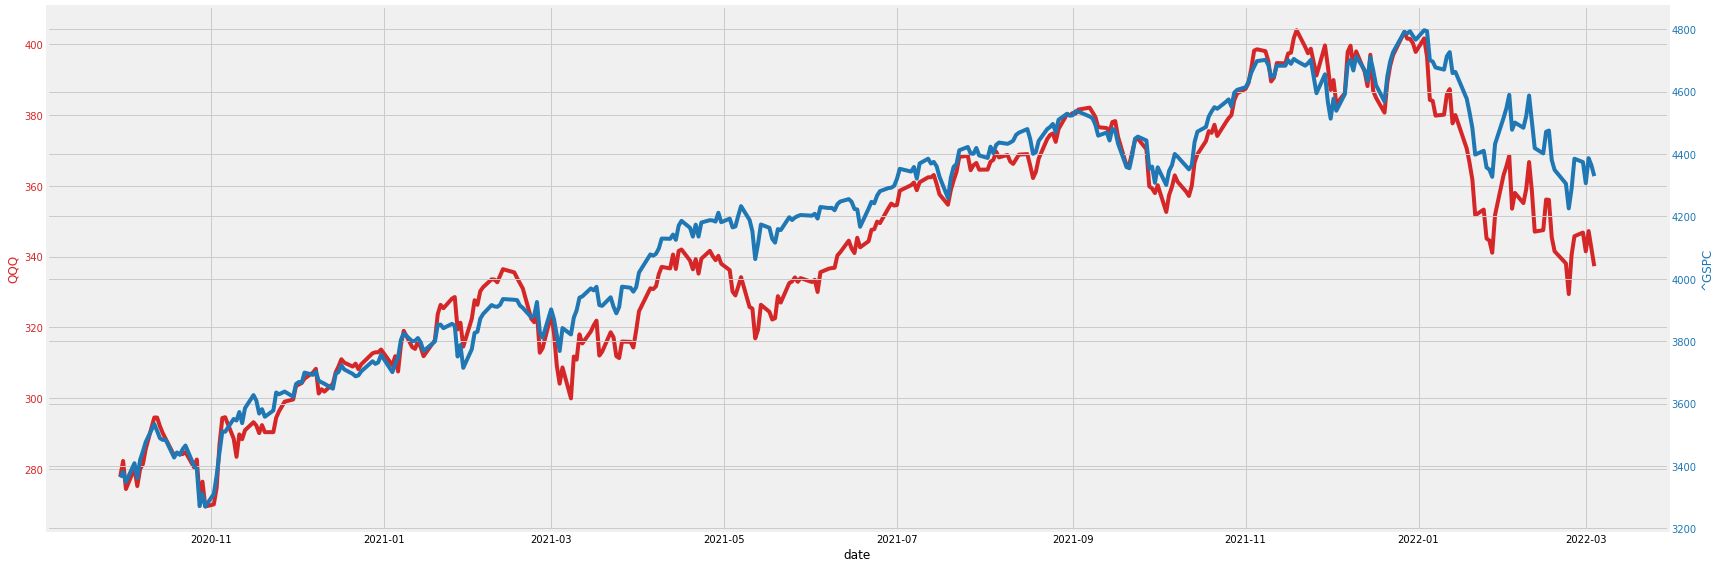

In [28]:
plotGraph('QQQ', '^GSPC')

# Copper (銅) 指標と比べる

Copper = 'HG=F'

銅の需要は経済の健全性を示す

S&P が大きく下がる前に、Copper の先物が反落する。

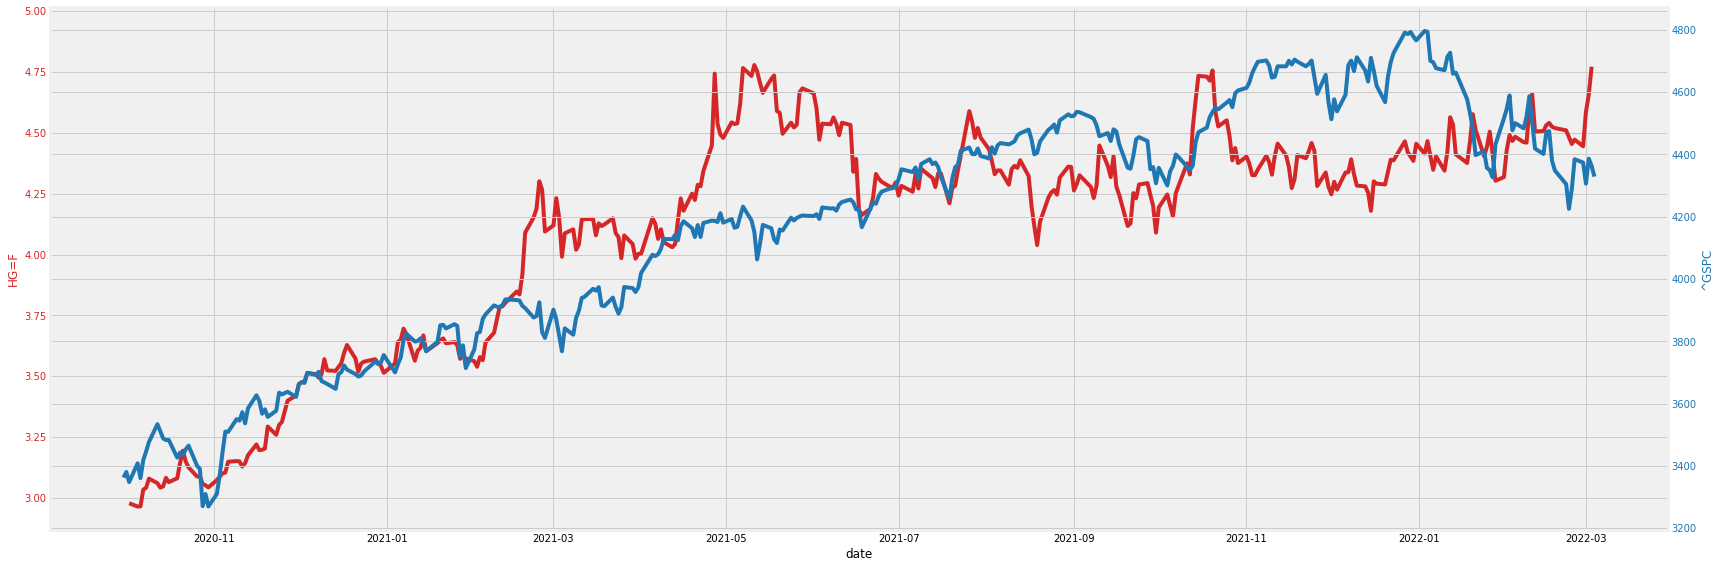

In [30]:
plotGraph('HG=F', '^GSPC')

# SOX (半導体) 指標と比べる

PHLX半導体セクターインデックス (SOX) は、半導体企業30社で構成される
時価総額加重型のインデックスであり、半導体の設計、
流通、製造、販売を主な事業内容とする企業で構成されている。

半導体は工場需要でも、消費者需要でも先んじて必要とされる。(産業の米)

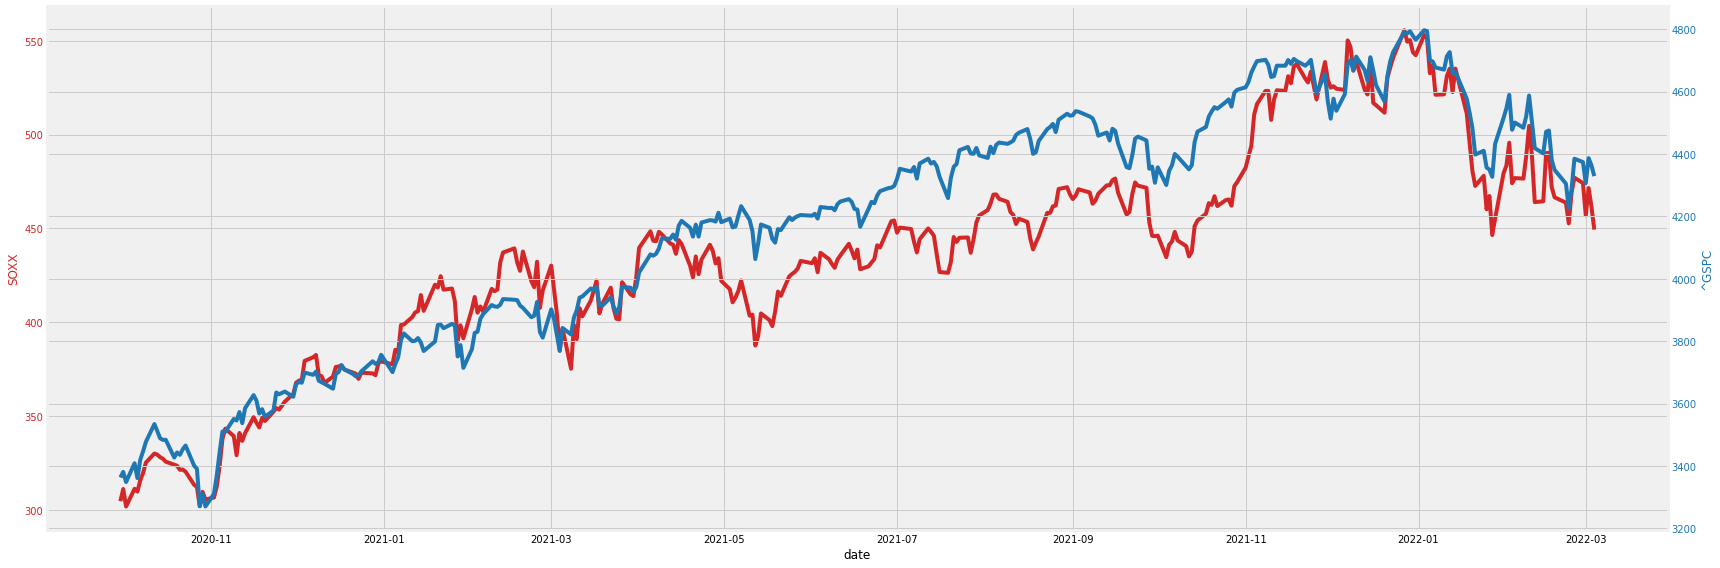

In [31]:
plotGraph('SOXX', '^GSPC')

# Transportation Average Index (DJTA)

Transporter Average Index (DJTA) は、特にダウ理論の支持者によって、
米国経済の状態を確認するために使われている。

物販は製造業、生産業の基本なので、物の移動が滞っている場合は、
経済の循環が遅くなっている可能性がある。

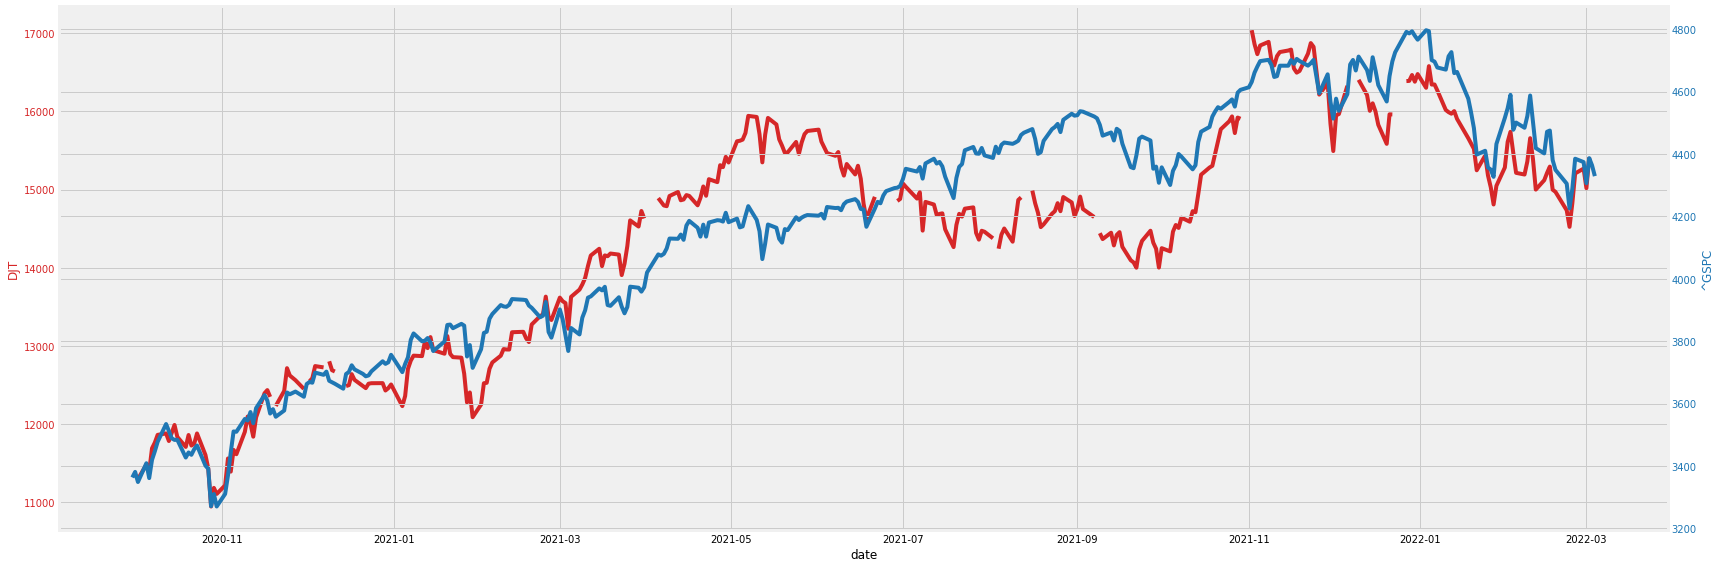

In [32]:
plotGraph('DJT', '^GSPC')

# Russel2000 と比べる

Russel2000 は、ニューヨーク証券取引所や Nasdaq などに上場している銘柄のうち、時価総額が上位 1001 位から 3000 位までの銘柄の浮動株調整後の時価総額
加重平均型の株価指数である。

小型株は大型株よりも景気に敏感な傾向がある。
大企業では、経済の状態が悪くても、すぐに経営に直結することはないが、
中小企業では大企業からの発注が減ると経営危機に直結することがあるので。
そのため、経済の悪化の指標となる。


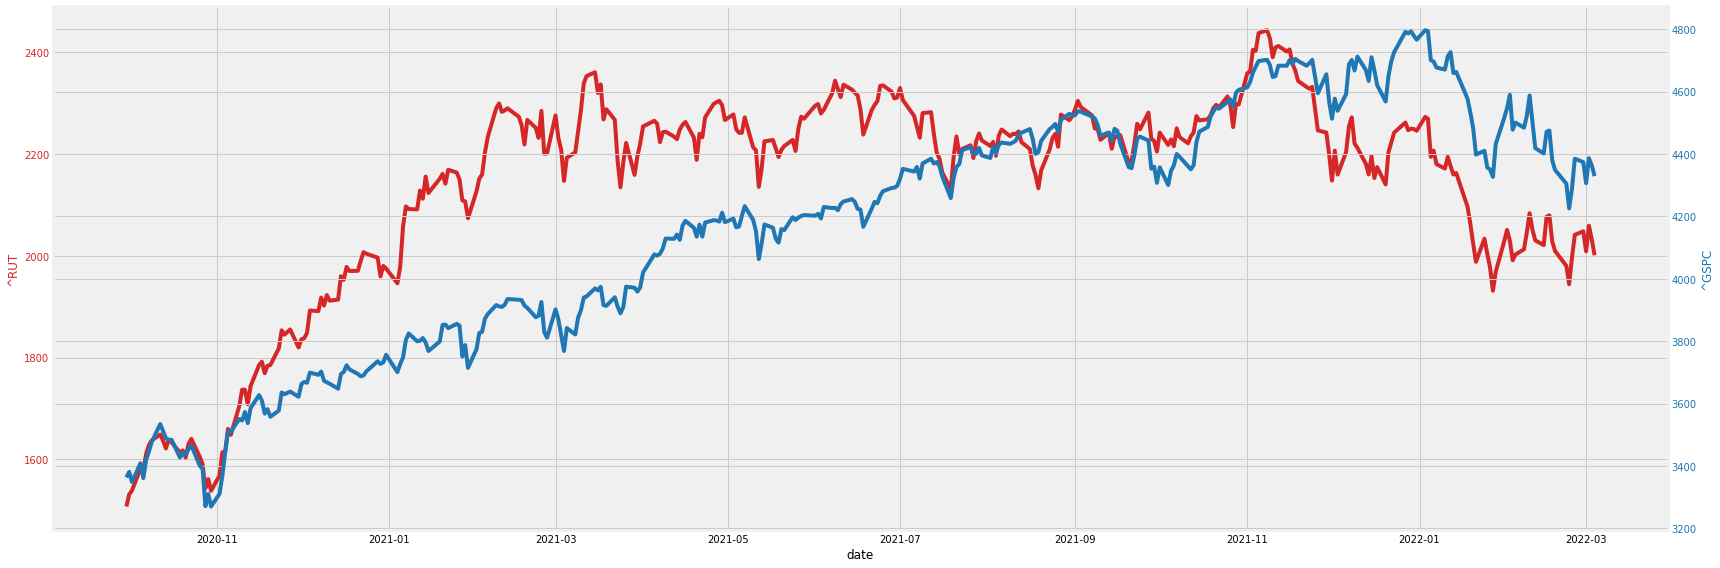

In [33]:
plotGraph('^RUT', '^GSPC')

# VIX と比較する。

VIX 指数とは、Volatility Index で恐怖指数とも呼ばれる。
S&P500 の変動幅を指数化したもので、
CBOE (シカゴのオプション取引所)が算出する。
S&Pとは反相関関係が成立する。

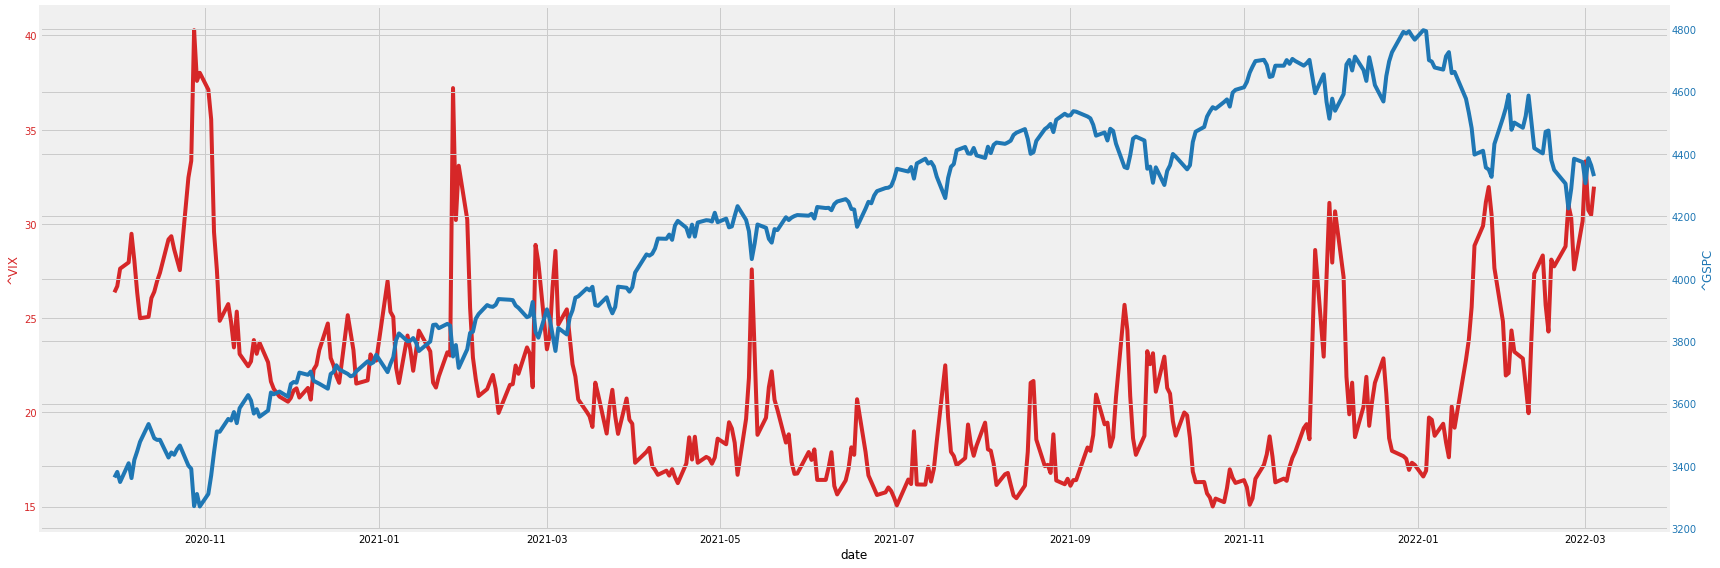

In [34]:
plotGraph('^VIX', '^GSPC')

# SKEW と比較する

SKEW とは、CBOE (シカゴおpしょん取引所)が算出する「市場のゆがみ (= skew)」を数値化した指標である。
S&P500 指数を対象とするオプション取引で、コール(call, 買う権利)に対するプット(put, 売る権利) の需要の強さを表す。

オプション市場で将来の大きな価格変動に備える取引が増えると上昇し、
black swan (黒い白鳥、市場で想定外の事象)が出現する可能性を示唆する。

何らかの恐怖予測が市場に存在する場合に、大きく上昇する。

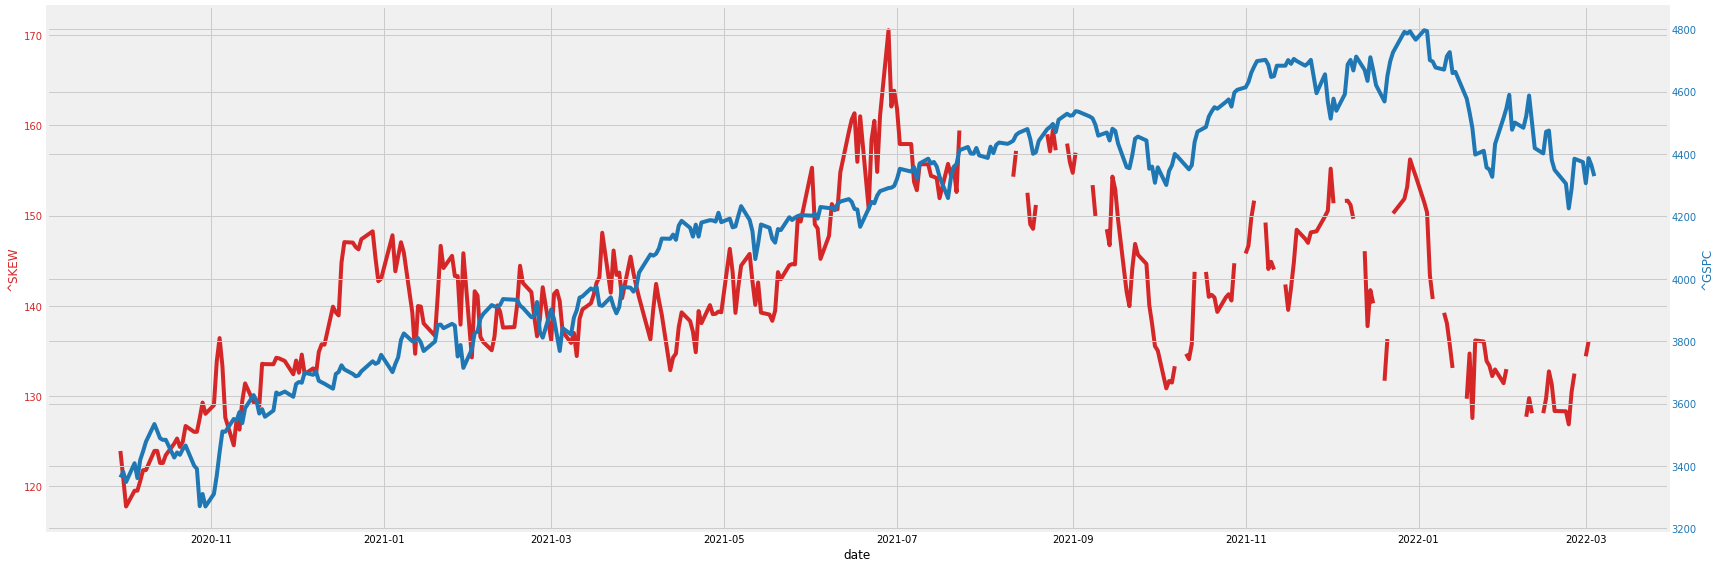

In [35]:
plotGraph('^SKEW', '^GSPC')

# ゴールドとの比較

ゴールドは「有事のゴールド」といわれるように、戦争や災害が発生した場合に上昇する傾向がある。

ただし、2020年3月は S&Pもゴールドも同時に下落している。
多くの企業が、支払いの現金を作りだすためにゴールドを売ったためかもしれない。その後は回復しているが。

また、ゴールドは2020年8月に高値をつけたあと、下落している。同時期に銅は上がっているが。

現在は、金本位制ではないので、昔ほど「有事のゴールド」とはいかなくなったようだ。その機能の一部が Bitcoin などの暗号通貨に移りつつあるという話もある。

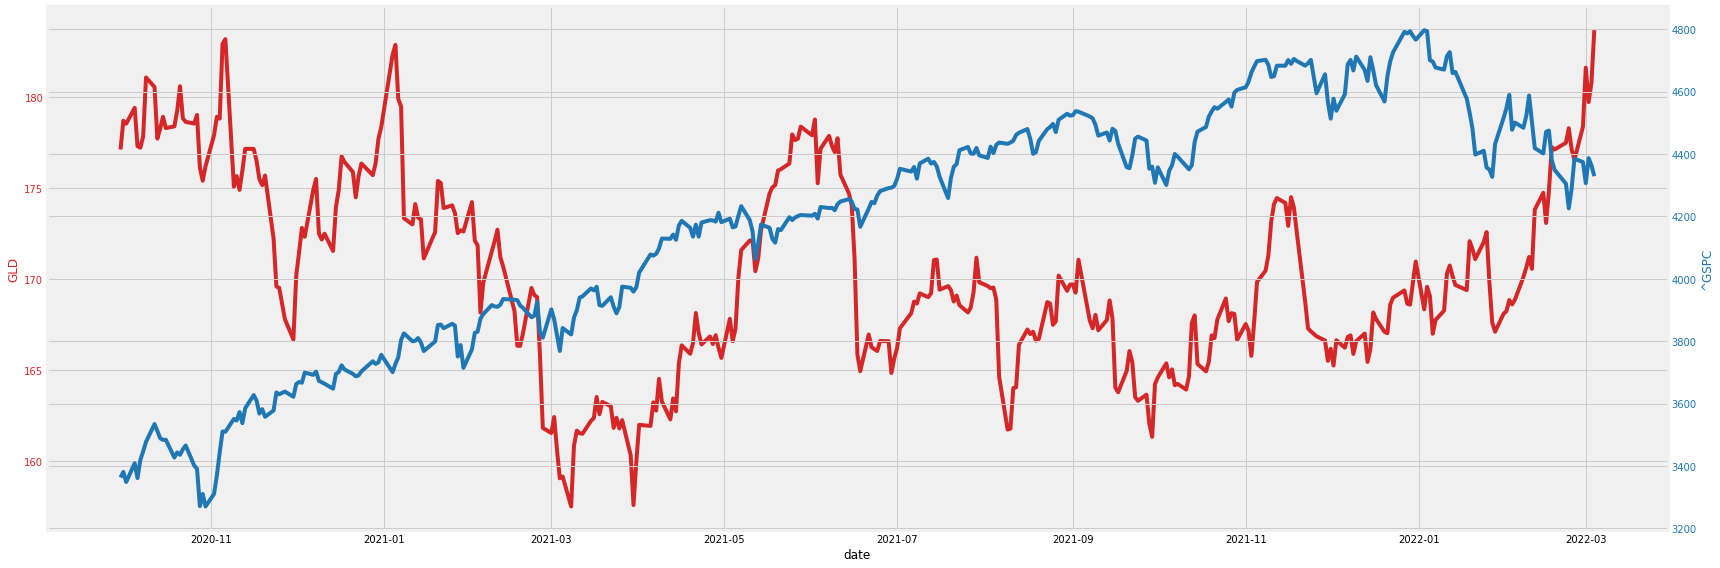

In [36]:
plotGraph('GLD', '^GSPC')

# ドル指標との比較

ドル指標は、コロナ後直下は価値が非常に上がっている。
これは、現金支払いなどのためにドルが必要とされたためだと思われる。

2021年になって再び上げてきているのは、ワクチンによるコロナ禍からの回復がアメリカでは早く進むとみられているからだと思われる。

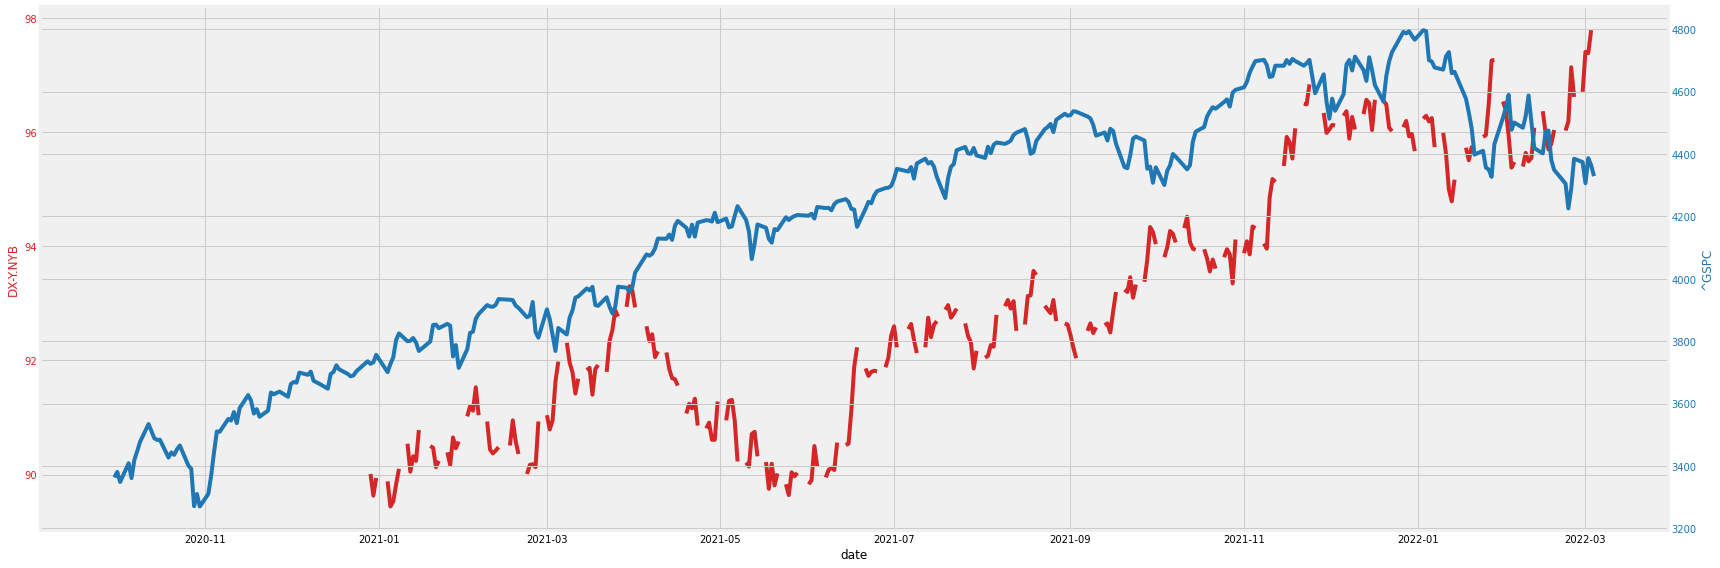

In [37]:
plotGraph('DX-Y.NYB', '^GSPC')

# ジャンクボンドとの比較

格付けが S&P でBB, ムーディーズで Ba以下のものがジャンクボンド (低格付け債券)である。利回りが高いことから、ハイイールド債とも呼ばれる。

ジャンクボンドが大きく動くときは、リスクオン、すなわち、投資家がリスクをとろうとしていることを表している。

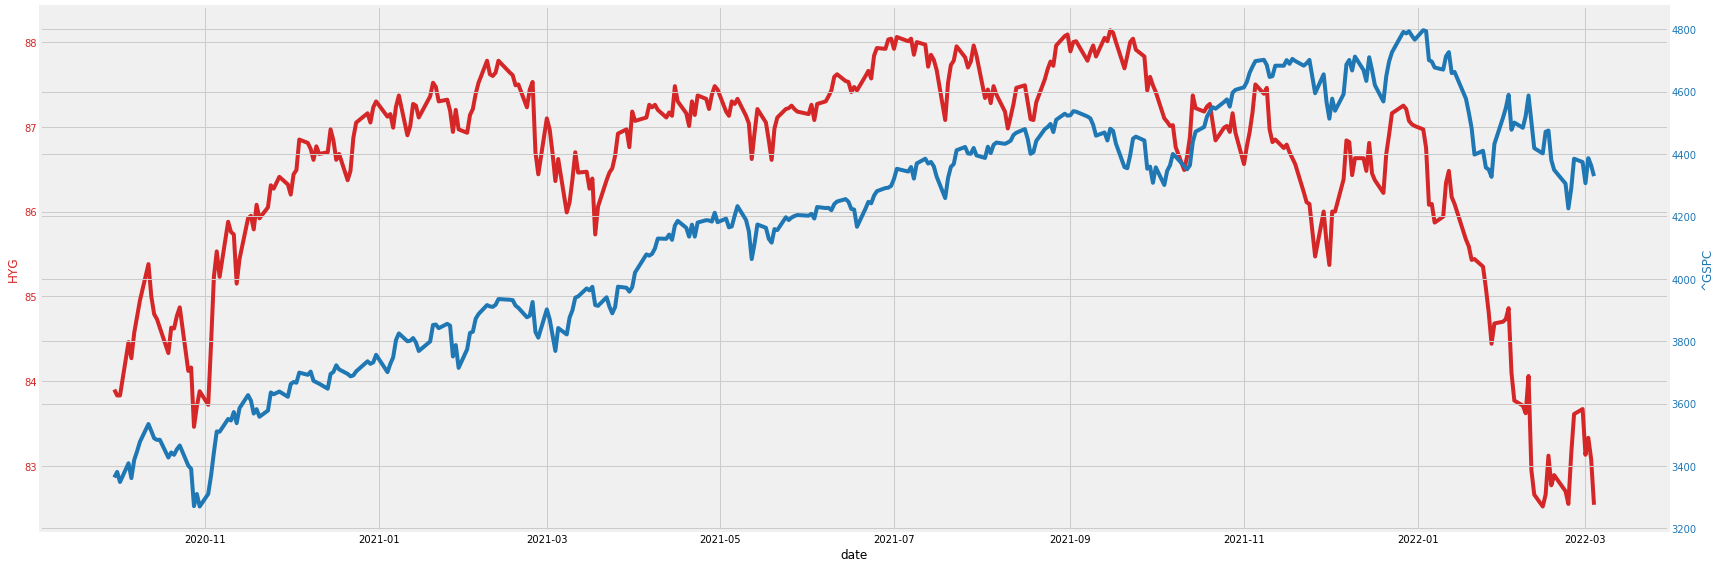

In [38]:
# High Yield index
plotGraph('HYG', '^GSPC')

# 米10年債との比較

株価に大きな影響を与えている。
FRBはコロナ後、大きく低金利に舵を取ったが、インフレ抑制のため 2022年は何度か短期金利 (FF金利, Federal Fund Rate) 利上げを行うことを予告している。

経済の回復を期待して、長期金利は徐々に上がってきている。

S&Pと米10年債は、時々相関関係、反相関関係と別々な動きをする。

2021年の最初は、
長期金利の上昇とともに、S&P500が停滞した。
S&P500 はハイテク企業が主導しているが、ハイテク企業は借金比率なども大きいので、長期金利がその貸付に影響しているとみられる。

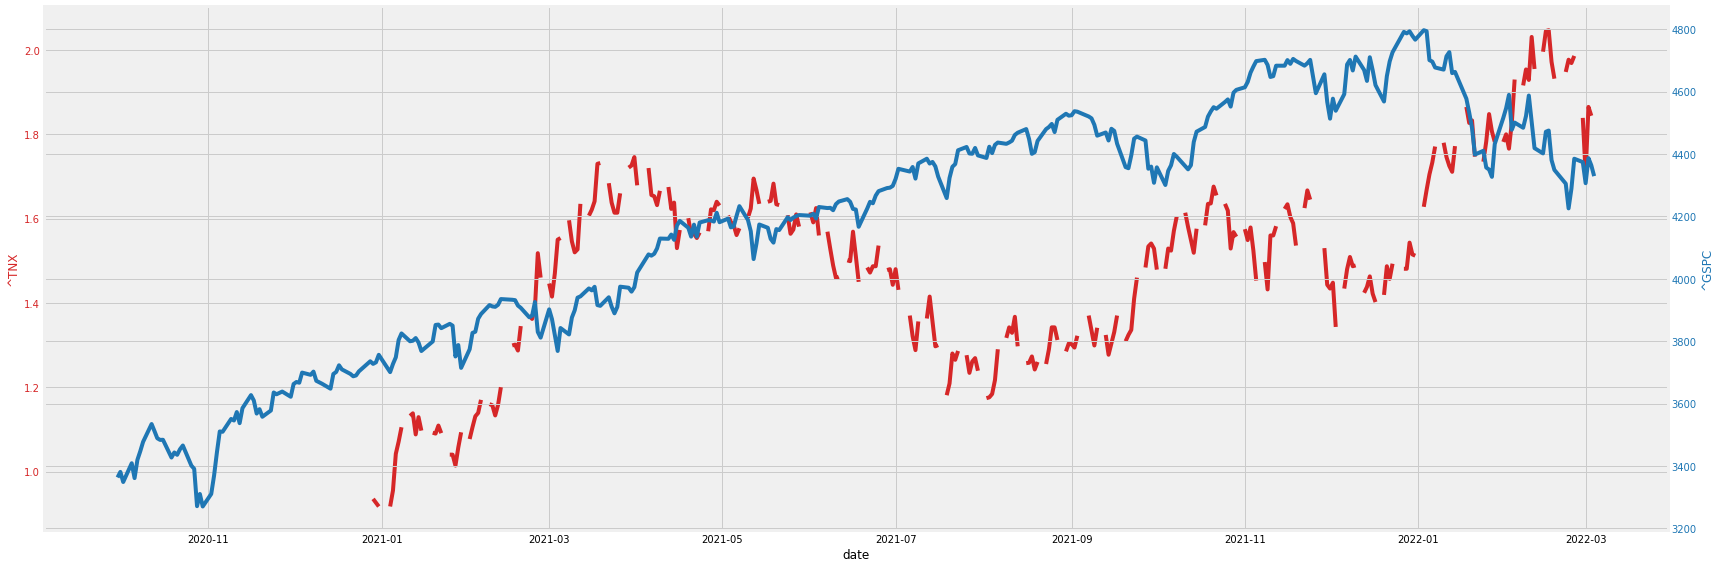

In [39]:
plotGraph('^TNX', '^GSPC')

# 相関関係グラフを作る

色が濃くなればなるほど、反相関関係にある。

VIXは、他の指標と反相関関係にあることがわかる。ドル指標とは若干連動しているようにも見えるが。

In [40]:
nasdaq_list = ["^GSPC","HG=F","SOXX","DJT","^RUT","^VIX","^SKEW","GLD","DX-Y.NYB","HYG","^TNX"]
index = 0
for symbol in nasdaq_list:
  past_date = date.today() + relativedelta(months=-12)
  past_date_yyyy_mm_dd = past_date.strftime('%Y-%m-%d')

  past_date_month_after = date.today() + relativedelta(months=0)
  past_date_yyyy_mm_dd_month_after = past_date_month_after.strftime('%Y-%m-%d')
  hist_data = si.get_data(symbol, start_date=past_date_yyyy_mm_dd, end_date=past_date_yyyy_mm_dd_month_after)
  temp_df = hist_data.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis = 1)
  
  temp_df['percentage'] = np.where(temp_df['close'] > temp_df['close'].shift(1), ((temp_df['close']-temp_df['close'].shift(1)) / temp_df['close'].shift(1))*100, ((temp_df['close']-temp_df['close'].shift(1)) / temp_df['close'].shift(1))*100)
  temp_df = temp_df.rename({'percentage': symbol}, axis=1)
  temp_df = temp_df.drop(['close'], axis = 1)
  if index > 0:
    result_df = pd.merge(result_df, temp_df, left_index=True, right_index=True)
  else:
    result_df = temp_df
  index = index + 1  

def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[:]:
    fig.add_scatter(x = df.index, y = df[i], name = i) # add a new Scatter trace

  fig.show()

interactive_plot(result_df, 'Percentage movement comapred to previous day')

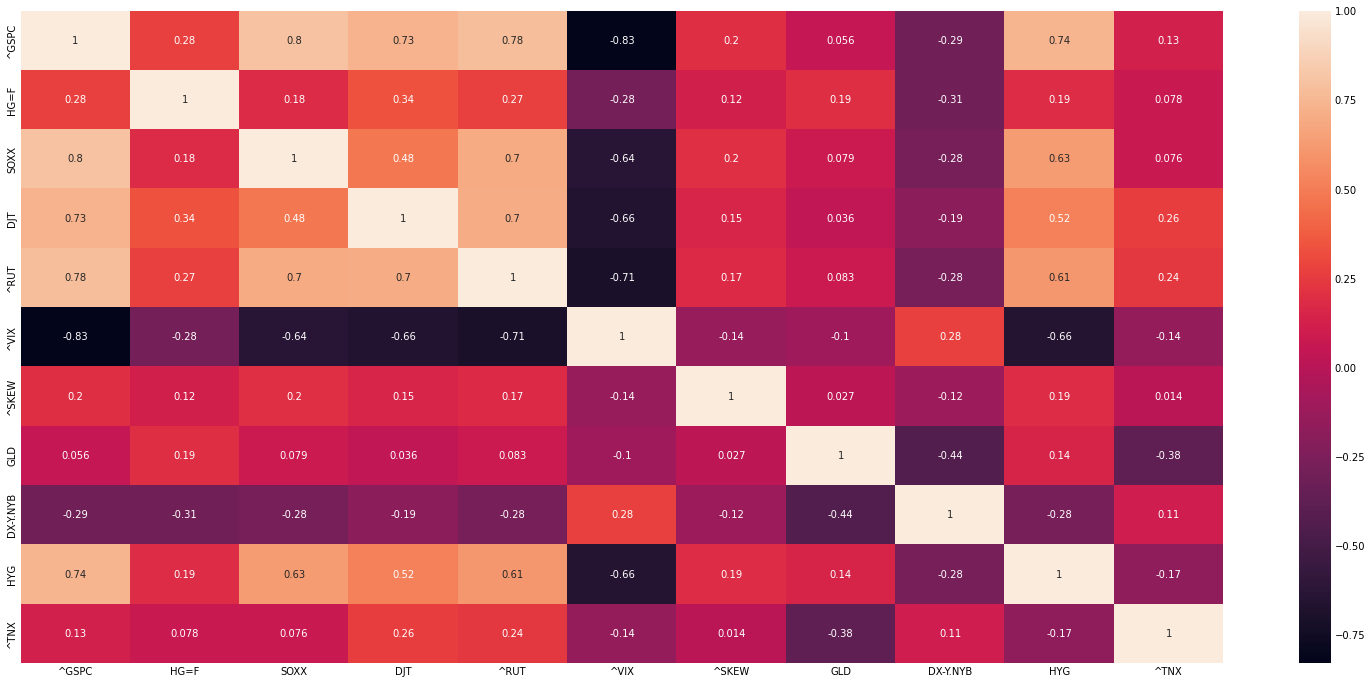

In [44]:
#CORRELATIONS
correlation = result_df.corr()
fig, ax = plt.subplots(1,1,figsize=(24,12))
sns.heatmap(correlation, annot = True, ax = ax);

# ヒストグラムを作る

それぞれのアセットがどれくらいのボラティリティがあって、どのように散らばっているのか、プラスになる傾向があるか、マイナスになる傾向があるかを見るためにヒストグラムを作る。

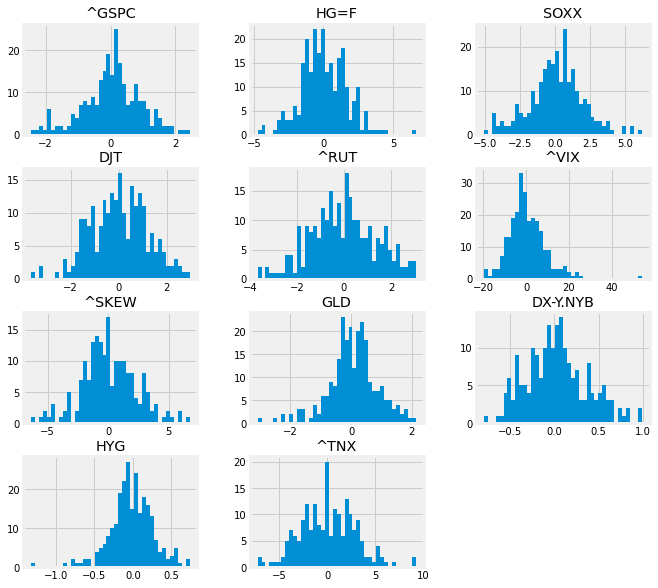

In [42]:
result_df.hist(figsize=(10, 10), bins = 40);